# SN1 & SN2

Fitting SN1 and SN2 cubes is very similar to fitting SN# cubes with one exception -- the machine learning algorithm used to estimate the velocity and broadening was trained on SN3, and, therefore, we cannot use it estimate these parameters in other data cubes. Thus, I have implemented another basic algorithm that will estimate the shift and broadening of the lines in SN1 and SN2.

Let's start with importing `LUCI`. Just as described on the *readthedocs* page, we need to point our system path to our install location of the **LUCI** folder.

In [1]:
# Imports
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt
import numpy as np

We now will set the required parameters. We are also going to be using our machine learning algorithm to get the initial guesses.

In [ ]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/home/carterrhea/Documents/M33/SN1'  # Path to data cube
cube_name = 'SN1_Field7'  # don't add .hdf5 extension
object_name = 'M33_Field7'
redshift = -0.0006  # Redshift of M33
resolution = 1000

In [ ]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

Let's quickly create a deep frame

In [ ]:
# Create Deep Image
cube.create_deep_image()

Let's extract a background region and take a look at it. The background region is defined in a ds9 region file.

In [ ]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum
plt.plot(bkg_axis, bkg_sky)

We now fit part of our cube defined by the bounding box 1000<x<1500 and 250<y<750 with a Gaussian on the Halpha line, the NII-doublet, and the SII-doublet with a binning of 2. We will also tie all of our parameters together.

In [ ]:
# Fit!
vel_map, broad_map, flux_map, chi2_fits = cube.fit_cube(['OII3726', 'OII3729'], 'gaussian', [1, 1], [1, 1], 500, 1100, 700, 1300, bkg=bkg_sky, binning=2)
#vel_map, broad_map, flux_map, chi2_fits = cube.fit_cube(['OII3726'], 'gaussian', [1], [1], 1700, 1900, 1200, 1400, bkg=bkg_sky, binning=2, bayes_bool=True)

Let's take a look at the flux map.

In [ ]:
lplt.plot_map(flux_map[:,:,0], 'flux', cube_dir, cube.header, clims=[1e-18, 3e-16])

Let's now do the same with SN2

In [2]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/home/carterrhea/Documents/M33/SN2'  # Path to data cube
cube_name = 'SN2_Field7'  # don't add .hdf5 extension
object_name = 'M33_Field7'
redshift = -0.0006  # Redshift of M33
resolution = 1000

In [3]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

  0%|          | 0/9 [00:00<?, ?it/s]

Reading in data...


100%|██████████| 9/9 [00:17<00:00,  1.94s/it]


In [4]:
# Create Deep Image
cube.create_deep_image()

100%|██████████| 2064/2064 [00:08<00:00, 246.87it/s]


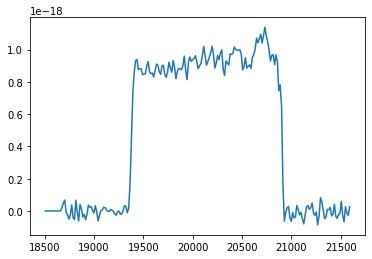

In [5]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum
plt.plot(bkg_axis, bkg_sky)

In [ ]:
vel_map, broad_map, flux_map, chi2_fits = cube.fit_cube(['OIII4959', 'OIII5007', 'Hbeta'], 'gaussian', [1,1,1], [1,1,1], 500, 1100, 700, 1300, bkg=bkg_sky, binning=2)
#vel_map, broad_map, flux_map, chi2_fits = cube.fit_cube(['OIII4959', 'OIII5007', 'Hbeta'], 'gaussian', [1,1,1], [1,1,1], 1200, 1400, 1700, 1900, bkg=bkg_sky, binning=2)

 34%|███▎      | 101/300 [07:51<14:47,  4.46s/it]

In [ ]:
lplt.plot_map(np.log10(flux_map[:,:,2]), 'flux', cube_dir, cube.header, clims=[1e-20, 5e-19])